In [ ]:
from tensorflow.python.summary.summary_iterator import summary_iterator

        

# test

In [10]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [11]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.3


In [41]:
# get data from event file
df = pd.DataFrame()
data = []
for e in summary_iterator("logs/model_weighted_CCE_80_1_1e-07_aug_asvspoof_2019_linear_nll_2l_online/events.out.tfevents.1693285013.AISRC2"):
    # each step is a row
    # each tag is a column
    for v in e.summary.value:
        data.append((e.step, v.tag, v.simple_value))
        
df = pd.DataFrame(data, columns=['step', 'tag', 'value'])
print(df.head)
df.to_csv('logs/model_weighted_CCE_80_1_1e-07_aug_asvspoof_2019_linear_nll_2l_online.csv', index=False)
# val_L_CEdf[df.tag == 'val_L_CE']['value']

<bound method NDFrame.head of      step             tag      value
0       0  train_accuracy  50.275192
1       0    val_accuracy  51.310833
2       0        val_loss   0.472823
3       0            loss   0.497764
4       0      train_L_CE   0.584476
..    ...             ...        ...
665    66     train_L_CF1   1.169196
666    66     train_L_CF2   1.174435
667    66        val_L_CE   0.009723
668    66       val_L_CF1   1.198038
669    66       val_L_CF2   1.191209

[670 rows x 3 columns]>


In [31]:

df = pd.DataFrame(data, columns=['step', 'tag', 'value'])
df.tag.unique()

array(['train_accuracy', 'val_accuracy', 'val_loss', 'loss', 'train_L_CE',
       'train_L_CF1', 'train_L_CF2', 'val_L_CE', 'val_L_CF1', 'val_L_CF2'],
      dtype=object)

In [16]:
# convert to pandas dataframe
df = pd.DataFrame(data)

In [17]:
df.head()

,0,1,2
0,0,train_accuracy,54.545456
1,0,val_accuracy,54.545456
2,0,val_loss,0.476058
3,0,loss,0.482235
4,0,train_L_CE,0.528406


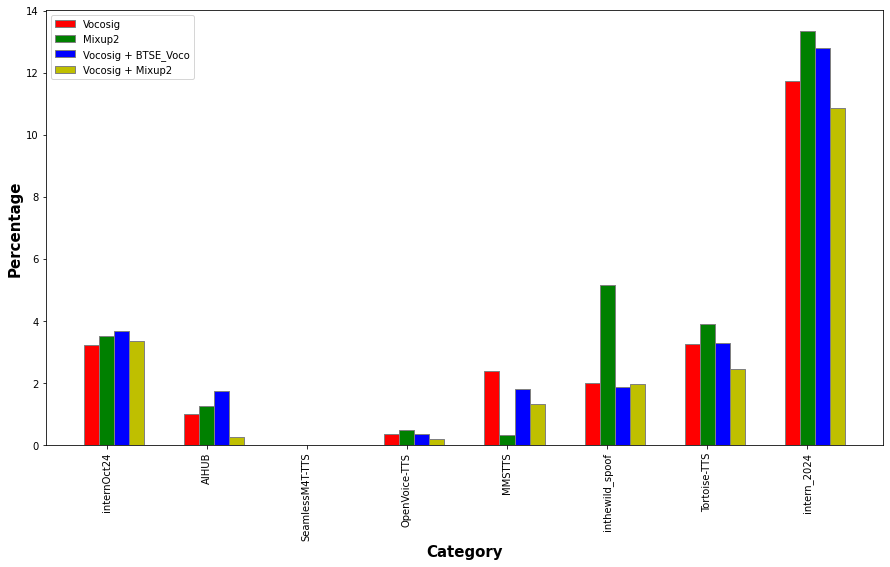

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

data = {
    'Vocosig': {
        'intern_2023': 3.2258,
        'AIHUB': 1.0000,
        'SeamlessM4T-TTS': 0.0000,
        'OpenVoice-TTS': 0.3600,
        'MMSTTS': 2.4000,
        'inthewild_spoof': 2.0046,
        'Tortoise-TTS': 3.2500,
        'intern_2024': 11.7438
    },
    'Mixup2': {
        'intern_2023': 3.5191,
        'AIHUB': 1.2500,
        'SeamlessM4T-TTS': 0.0000,
        'OpenVoice-TTS': 0.4800,
        'MMSTTS': 0.3333,
        'inthewild_spoof':5.1486,
        'Tortoise-TTS': 3.9000,
        'intern_2024': 13.3452,
    },
    
    'Vocosig + BTSE_Voco': {
        'intern_2023': 3.6657,
        'AIHUB': 1.7500,
        'SeamlessM4T-TTS': 0.0000,
        'OpenVoice-TTS': 0.3600,
        'MMSTTS': 1.8000,
        'inthewild_spoof': 1.8847,
        'Tortoise-TTS': 3.3000,
        'intern_2024': 12.8114
    },
    'Vocosig + Mixup2': {
        'intern_2023': 3.3724,
        'AIHUB': 0.2500,
        'SeamlessM4T-TTS': 0.0000,
        'OpenVoice-TTS': 0.2000,
        'MMSTTS': 1.3333,
        'inthewild_spoof': 1.9789,
        'Tortoise-TTS': 2.4500,
        'intern_2024': 10.8541
    }
}

models = list(data.keys())
categories = list(data['Vocosig'].keys())
colors = ['r', 'g', 'b', 'y']

barWidth = 0.19
r = [np.arange(len(categories))]

for i in range(1, len(models)):
    r.append([x + barWidth for x in r[i-1]])

plt.figure(figsize=(15, 8))

for i, model in enumerate(models):
    plt.bar(r[i], [data[model][cat] for cat in categories], color=colors[i], width=barWidth, edgecolor='grey', label=model)

plt.xlabel('Data groups', fontweight='bold', fontsize=15)
plt.ylabel('False Positive Rate (%)', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(categories))], categories, rotation=90)


plt.legend(fontsize=15)
plt.show()

# Visualize mixup

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# TSNE visualization
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import os
from tqdm import tqdm

In [ ]:
###

### mixup 1

In [46]:
emb_path = '/dataa/phucdt/vocodetect/Supcon-voco/feats/asvspoof_2019_mixup_1_2/'
# list all embeddings in folder and append to a list

file_list = os.listdir(emb_path)
labels = []
emb=[]
label = [0,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3] 
for file in tqdm(file_list):
    tmp = torch.load(emb_path + file).squeeze(-1).squeeze(1)
    emb.append(tmp)
    labels = labels + label





100%|██████████| 692/692 [00:00<00:00, 3650.67it/s]


In [54]:
emb = np.array(emb)
# convert to 2D array
emb_ = emb.reshape(-1, emb.shape[-1])
print(emb_.shape)

(11072, 128)


In [56]:
labels = np.array(labels)

[0 1 1 ... 2 3 3]


/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


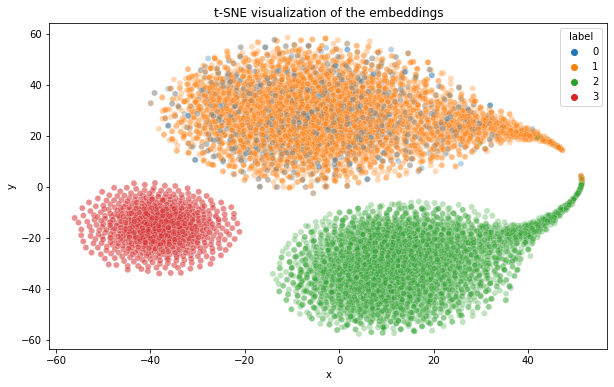

In [58]:


tsne = TSNE(n_components=2, random_state=0)
emb_2d = tsne.fit_transform(emb_)


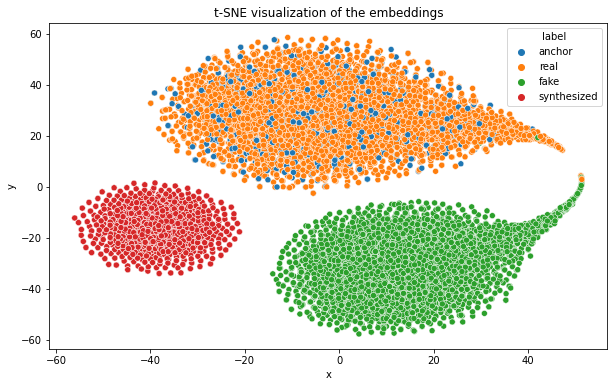

In [62]:

# create a dataframe
emb_df = pd.DataFrame(emb_2d, columns=["x", "y"])
emb_df['label'] = labels
# emb_df['label'] = emb_df['label'].astype(str)

# change label from number to string
emb_df['label'] = emb_df['label'].map({0: "anchor", 1: "real", 2: "fake", 3: "synthesized"})

# plot the 2D data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x="x", y="y", hue="label", data=emb_df, legend="full", alpha=1)
plt.title("t-SNE visualization of the embeddings")
plt.show()

### mixup3

In [21]:
emb_path = '/dataa/phucdt/vocodetect/Supcon-voco/feats/asvspoof_2019_mixup_1_2/'
# list all embeddings in folder and append to a list

file_list = os.listdir(emb_path)
file_list=file_list
labels = []
emb=[]
label = [0,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3] 
for file in tqdm(file_list):
    tmp = torch.load(emb_path + file).squeeze(1).squeeze(1)
    emb.append(tmp)
    labels = labels + label


emb = np.array(emb)
# convert to 2D array
emb_ = emb.reshape(-1, emb.shape[-1])
print(emb_.shape)


# tsne = TSNE(n_components=2, random_state=0)
# emb_2d = tsne.fit_transform(emb_)

100%|██████████| 1688/1688 [00:01<00:00, 934.15it/s] 

(27008, 128)


In [26]:
emb_2d = emb_[:,-2:]

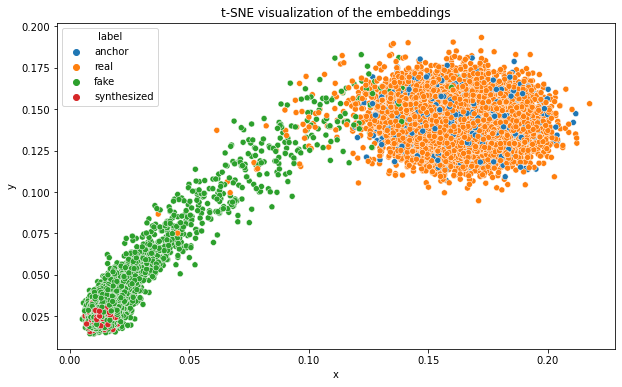

In [27]:

# create a dataframe
emb_df = pd.DataFrame(emb_2d, columns=["x", "y"])
emb_df['label'] = labels
# emb_df['label'] = emb_df['label'].astype(str)

# change label from number to string
emb_df['label'] = emb_df['label'].map({0: "anchor", 1: "real", 2: "fake", 3: "synthesized"})

# plot the 2D data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x="x", y="y", hue="label", data=emb_df, legend="full", alpha=1)
plt.title("t-SNE visualization of the embeddings")
plt.show()

### mixup 4


In [14]:
emb_path = '/dataa/phucdt/vocodetect/Supcon-voco/feats/asvspoof_2019_mixup_1_2/'
# list all embeddings in folder and append to a list

file_list = os.listdir(emb_path)
file_list=file_list
labels = []
emb=[]
label = [0,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3] 
for file in tqdm(file_list):
    tmp = torch.load(emb_path + file).squeeze(1).squeeze(1)
    emb.append(tmp)
    labels = labels + label


emb = np.array(emb)
# convert to 2D array
emb_ = emb.reshape(-1, emb.shape[-1])
print(emb_.shape)


tsne = TSNE(n_components=2, random_state=0)
emb_2d = tsne.fit_transform(emb_)

100%|██████████| 1688/1688 [00:00<00:00, 2279.86it/s]
/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(27008, 128)


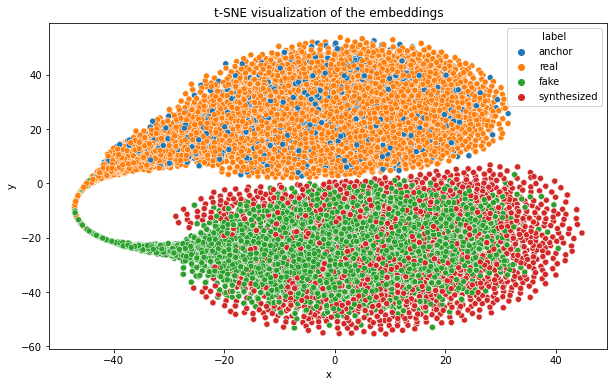

In [15]:

# create a dataframe
emb_df = pd.DataFrame(emb_2d, columns=["x", "y"])
emb_df['label'] = labels
# emb_df['label'] = emb_df['label'].astype(str)

# change label from number to string
emb_df['label'] = emb_df['label'].map({0: "anchor", 1: "real", 2: "fake", 3: "synthesized"})

# plot the 2D data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x="x", y="y", hue="label", data=emb_df, legend="full", alpha=1)
plt.title("t-SNE visualization of the embeddings")
plt.show()

### mixup5

In [3]:
emb_path = '/dataa/phucdt/vocodetect/Supcon-voco/feats/asvspoof_2019_mixup_1_2/'
# list all embeddings in folder and append to a list

file_list = os.listdir(emb_path)
file_list=file_list[:]
labels = []
emb=[]
label = [0,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3] 
for file in tqdm(file_list):
    tmp = torch.load(emb_path + file).squeeze(1).squeeze(1)
    emb.append(tmp)
    labels = labels + label


emb = np.array(emb)
# convert to 2D array
emb_ = emb.reshape(-1, emb.shape[-1])
print(emb_.shape)


tsne = TSNE(n_components=2, random_state=0)
emb_2d = tsne.fit_transform(emb_)

  0%|          | 0/232 [00:00<?, ?it/s]

100%|██████████| 232/232 [00:00<00:00, 2139.95it/s]
/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/phucdt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(3712, 128)


In [7]:
emb_2d = emb_[:,-2:]

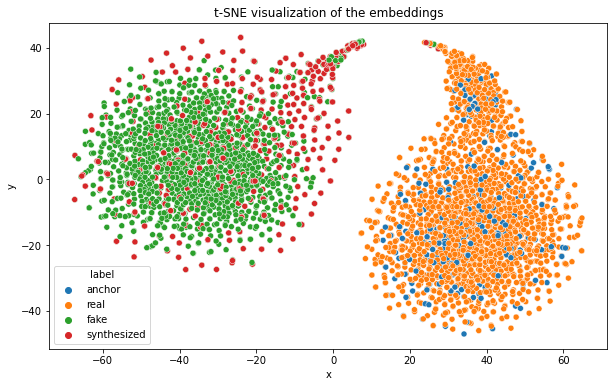

In [5]:

# create a dataframe
emb_df = pd.DataFrame(emb_2d, columns=["x", "y"])
emb_df['label'] = labels
# emb_df['label'] = emb_df['label'].astype(str)

# change label from number to string
emb_df['label'] = emb_df['label'].map({0: "anchor", 1: "real", 2: "fake", 3: "synthesized"})

# plot the 2D data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x="x", y="y", hue="label", data=emb_df, legend="full", alpha=1)
plt.title("t-SNE visualization of the embeddings")
plt.show()